# Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms
**Name:** Tushar Jitendrakumar Limbachiya
**Course Title:** MSCS 634 – Machine Learning  
**Lab Title:** Lab 3 – Clustering Analysis Using K-Means and K-Medoids  


In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Explore dataset
print(X.head())
print("\nClass Distribution:")
print(pd.Series(y).value_counts())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluation metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-Means Adjusted Rand Index: {kmeans_ari:.3f}")


K-Means Silhouette Score: 0.285
K-Means Adjusted Rand Index: 0.897


In [3]:
# Install if not already installed

from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Load and scale the dataset
data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42, method='pam')
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Evaluation metrics
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

print(f"K-Medoids Silhouette Score: {kmedoids_silhouette:.3f}")
print(f"K-Medoids Adjusted Rand Index: {kmedoids_ari:.3f}")


K-Medoids Silhouette Score: 0.268
K-Medoids Adjusted Rand Index: 0.741


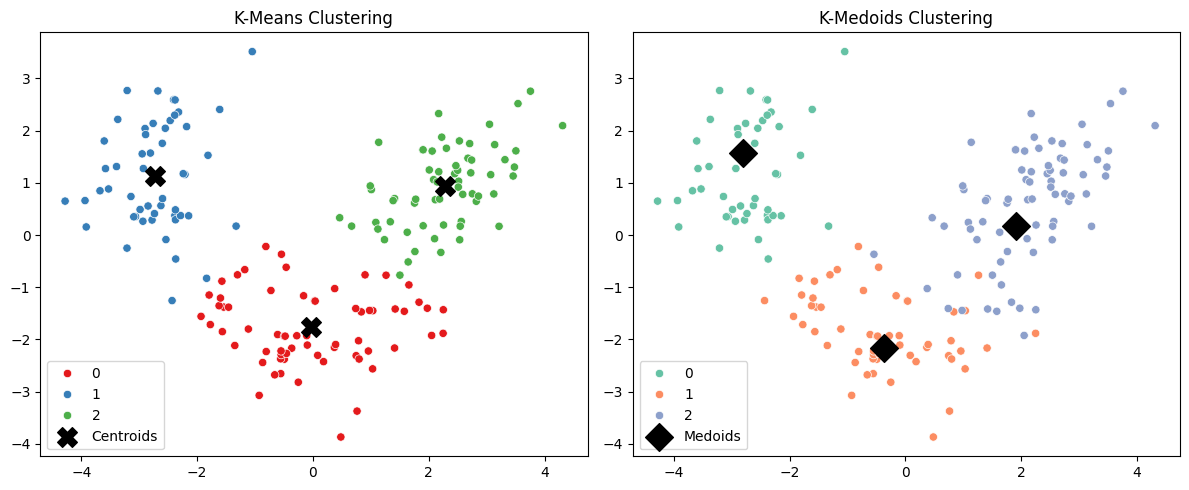

In [4]:
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot K-Means clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            color='black', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()

# Plot K-Medoids clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmedoids_labels, palette='Set2')
plt.scatter(pca.transform(kmedoids.cluster_centers_)[:, 0], 
            pca.transform(kmedoids.cluster_centers_)[:, 1], 
            color='black', marker='D', s=200, label='Medoids')
plt.title('K-Medoids Clustering')
plt.legend()

plt.tight_layout()
plt.show()
